In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [230]:
abusive_df = pd.read_csv('abusive.csv')
kamus_df = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)

In [4]:
hate_speech = pd.read_csv('data.csv', encoding='latin-1')

In [127]:
hate_speech.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,word_length
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,17.282102
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,10.231973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,23.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000


In [57]:
word = 'Hello world'
len(word.split())

2

In [40]:
hate_speech['Tweet'].loc[0]

"- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"

## WORD LENGTH

In [139]:
hate_speech['word_length'] = hate_speech['Tweet'].apply(lambda char: len(char.split()))
average_word_length = hate_speech['Tweet'].apply(lambda char: len(char.split())).mean()
print(average_word_length)

17.282101905991343


In [228]:
hate_speech_std = hate_speech['word_length'].std()
hate_speech_std

10.231972972784822

In [229]:
hate_speech_var = hate_speech['word_length'].var()
hate_speech_var

104.69327091579908

In [90]:
from scipy.stats import trim_mean

trim_word_length = trim_mean(hate_speech['word_length'], proportiontocut=0.2)
print(trim_word_length)

# we can see average word length equals to 17, but we know that the plot is right-skewed
# which means the mean most likely be affected by outliers. So mean doesn't really represent the typical word length
# to tackle this we use trimmed mean instead
# using trimmed mean, we have 15 words to represent typical comment

15.587245349867139


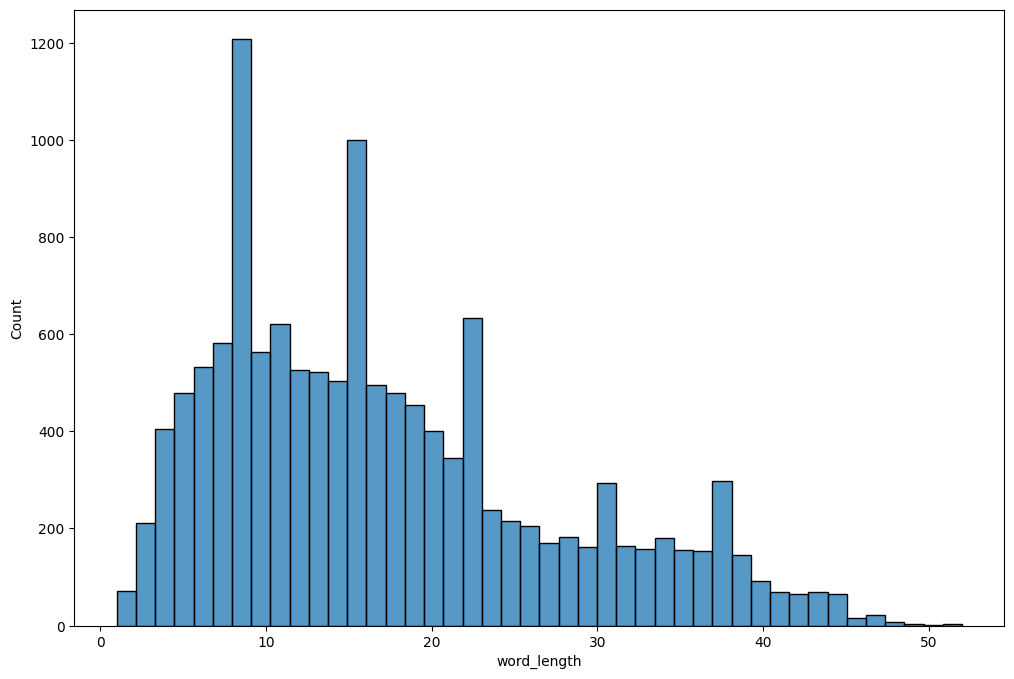

<Figure size 640x480 with 0 Axes>

In [237]:
plt.figure(figsize=(12, 8))
sns.histplot(x='word_length', data=hate_speech)
plt.show()
plt.clf()

In [227]:
indi = hate_speech['HS_Individual'][hate_speech.HS_Individual == 1]
indi.sum()

3575

In [226]:
group = hate_speech['HS_Group'][hate_speech.HS_Group == 1]
group.sum()

1986

## WORD LENGTH FOR HATE SPEECH TARGETED TO INDIVIDUAL & GROUP

In [215]:
individual_hs_word_length = hate_speech['word_length'][hate_speech.HS_Individual == 1]
individual_hs_word_length.sum()

54612

In [216]:
group_hs_word_length = hate_speech['word_length'][hate_speech.HS_Group == 1]
group_hs_word_length.sum()

32889

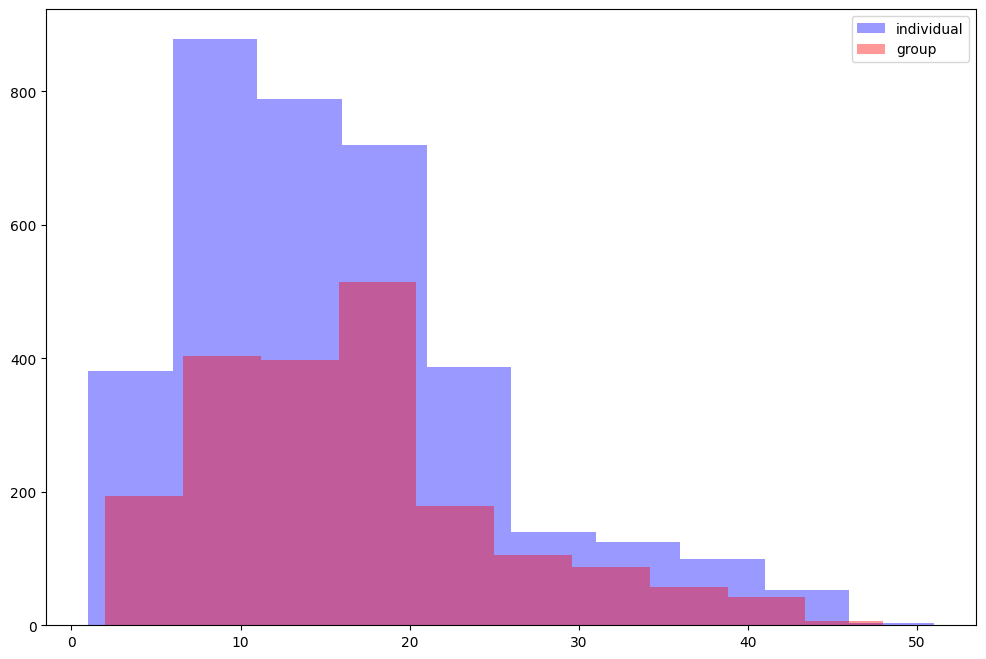

<Figure size 640x480 with 0 Axes>

In [238]:
plt.figure(figsize=(12, 8))
plt.hist(individual_hs_word_length, color='blue', label='individual', alpha=0.4)
plt.hist(group_hs_word_length, color='red', label='group', alpha=0.4)
plt.legend()
plt.show()
plt.clf()

## HATE SPEECH POWER & ITS WORD LENGTH

In [190]:
weak_hs_word_length = hate_speech['word_length'][hate_speech.HS_Weak == 1]
weak_hs_word_length.sum()

52049

In [189]:
moderate_hs_word_length= hate_speech['word_length'][hate_speech.HS_Moderate == 1]
moderate_hs_word_length.sum()

29150

In [188]:
strong_hs_word_length = hate_speech['word_length'][hate_speech.HS_Strong == 1]
strong_hs_word_length.sum()

6302

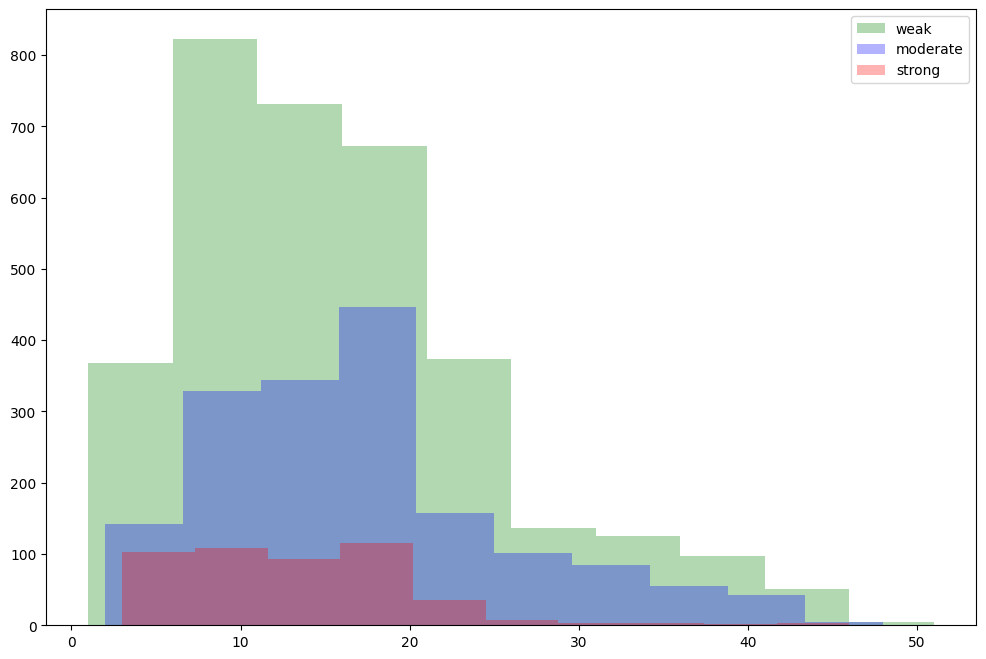

<Figure size 640x480 with 0 Axes>

In [239]:
plt.figure(figsize=(12, 8))
plt.hist(weak_hs_word_length, color='green', label='weak', alpha=0.3)
plt.hist(moderate_hs_word_length, color='blue', label='moderate', alpha=0.3)
plt.hist(strong_hs_word_length, color='red', label='strong', alpha=0.3)
plt.legend()
plt.show()
plt.clf()

In [144]:
# sns.boxplot(data=hate_speech, x=['HS_Weak', 'HS_Moderate', 'HS_Strong'], y='word_length')
# plt.show()

## CATEGORY THAT HAS THE MOST RECORDS

In [140]:
hs_religion = hate_speech.HS_Religion.sum()
hs_race = hate_speech.HS_Race.sum()
hs_physical = hate_speech.HS_Physical.sum()
hs_gender = hate_speech.HS_Gender.sum()
hs_other = hate_speech.HS_Other.sum()
category_label = ['religion', 'race', 'pyhsical', 'gender', 'other']

hate_speech_category = [hs_religion, hs_race, hs_physical, hs_gender, hs_other]
hate_speech_total = np.array(hate_speech_category).sum()
np.array(hate_speech_category / hate_speech_total) 

array([0.13844274, 0.09881285, 0.05638966, 0.05342179, 0.65293296])

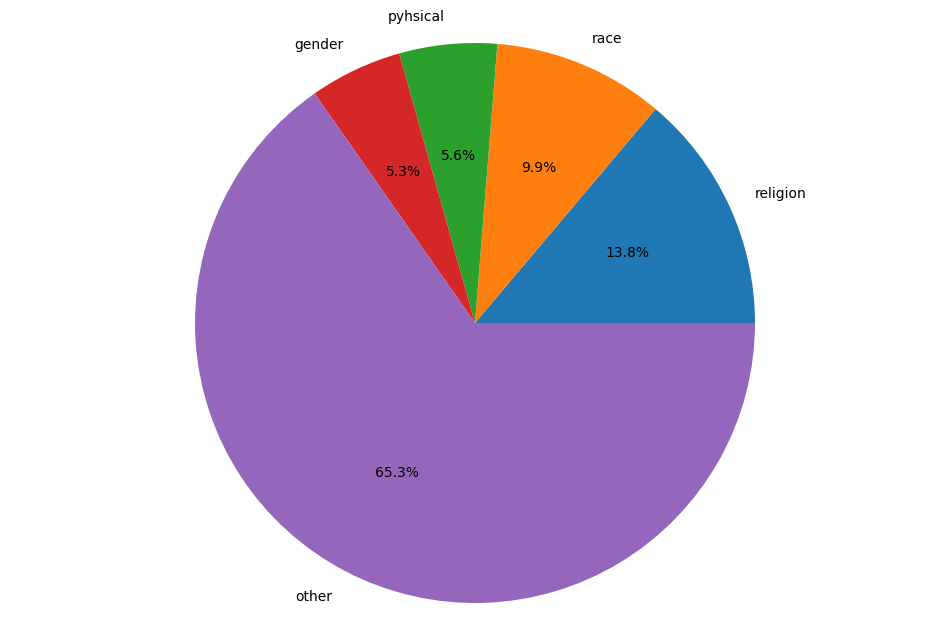

<Figure size 640x480 with 0 Axes>

In [240]:
plt.figure(figsize=(12, 8))
plt.pie(hate_speech_category, labels=category_label, autopct='%0.1f%%')
plt.axis('equal')
plt.show()
plt.clf()

In [34]:
strong_HS = hate_speech.HS_Strong.sum()
moderate_HS = hate_speech.HS_Moderate.sum()
weak_HS = hate_speech.HS_Weak.sum()

In [16]:
hate_speech[hate_speech.HS_Strong == 1].sum()

Tweet            Lengserkan Jokowi Bangsat!!RT USER: china babi...
HS                                                             473
Abusive                                                         65
HS_Individual                                                  192
HS_Group                                                       281
HS_Religion                                                     77
HS_Race                                                        141
HS_Physical                                                      2
HS_Gender                                                        4
HS_Other                                                       272
HS_Weak                                                          0
HS_Moderate                                                      0
HS_Strong                                                      473
dtype: object